In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #visualizing data 
%matplotlib inline 
import seaborn as sns
import openpyxl

In [2]:
df_cus_aq = pd.read_csv("Data_Analytics_Internship.csv")
df_spend = pd.read_csv("Spend.csv", index_col=False)
df_Repayment=pd.read_csv("Repayment.csv")

In [3]:
df_cus_aq['Age']=df_cus_aq['Age'].astype(int).astype(float)

In [4]:
df_cus_aq.loc[df_cus_aq['Age'] < 18, 'Age'] = 38.08

In [5]:
df_cus_aq['Age'].mean()

46.4576

In [6]:
print(df_cus_aq['Age'].unique())

[38.08 35.   45.   69.   52.   77.   18.   61.   40.   22.   70.   27.
 36.   51.   72.   29.   26.   76.   71.   57.   19.   47.   49.   62.
 68.   66.   59.   58.   78.   67.   25.   74.   44.   42.   28.   34.
 33.   50.   39.   56.   37.   55.   20.   21.   23.  ]


In [7]:
print(df_cus_aq)

    Sl No: Customer    Age        City Credit Card Product           Limit  \
0        1       A1  38.08   BANGALORE                Gold  INR 500,000.00   
1        2       A2  35.00    CALCUTTA              Silver  INR 100,000.00   
2        3       A3  38.08      COCHIN            Platimum   INR 10,000.00   
3        4       A4  45.00      BOMBAY            Platimum   INR 10,001.00   
4        5       A5  69.00   BANGALORE            Platimum   INR 10,002.00   
..     ...      ...    ...         ...                 ...             ...   
95      96      A96  29.00     CHENNAI              Silver  INR 100,000.00   
96      97      A97  20.00  TRIVANDRUM            Platimum   INR 10,000.00   
97      98      A98  40.00    CALCUTTA            Platimum   INR 10,001.00   
98      99      A99  21.00    CALCUTTA            Platimum   INR 10,002.00   
99     100     A100  23.00      COCHIN              Silver  INR 100,000.00   

   Company        Segment  
0       C1  Self Employed  
1      

In [8]:
print(df_spend)

      Sl No: Customer      Month        Type  Amount
0          1       A1  12-Jan-04   JEWELLERY  473776
1          2       A1  03-Jan-04       PETRO  335579
2          3       A1  15-Jan-04     CLOTHES  371041
3          4       A1  25-Jan-04        FOOD  141178
4          5       A1  17-Jan-05      CAMERA  398404
...      ...      ...        ...         ...     ...
1495    1496      A67  04-Feb-06  BUS TICKET  195841
1496    1497      A68  25-Mar-06  BUS TICKET  284263
1497    1498      A69  31-Mar-06  BUS TICKET  206552
1498    1499      A70  23-Mar-06  BUS TICKET   41025
1499    1500      A71  24-Mar-06  BUS TICKET  101398

[1500 rows x 5 columns]


In [9]:
df_Repayment['Amount']=df_Repayment['Amount'].astype(int)

In [10]:
print(df_Repayment)

      Serial Number  Customer      Month  Amount
0                  1       A1  12-Jan-04  331844
1                  2       A1  03-Jan-04  441139
2                  3       A1  15-Jan-04   32480
3                  4       A1  25-Jan-04   90636
4                  5       A1  17-Jan-05    1581
...              ...      ...        ...     ...
1495            1496      A67  09-May-05  200288
1496            1497      A68  10-May-06  231194
1497            1498      A69  11-Jul-06  391195
1498            1499      A70  12-Aug-05  357629
1499            1500      A71  13-Sep-04  179771

[1500 rows x 4 columns]


In [11]:
df_merged = pd.merge(df_cus_aq,df_spend,on='Customer')

In [12]:
date_col=pd.DatetimeIndex(df_merged['Month'])
df_merged['Day']=date_col.day
df_merged['Month_num']=date_col.month 
df_merged['Year']=date_col.year 


In [13]:
df_merged['Limit'] = df_merged['Limit'].str.replace(r'[^\d.]', '', regex=True)

In [14]:
df_merged['Limit']=df_merged['Limit'].astype(float).astype(int)

In [15]:
print(df_merged)

      Sl No:_x Customer    Age        City Credit Card Product   Limit  \
0            1       A1  38.08   BANGALORE                Gold  500000   
1            1       A1  38.08   BANGALORE                Gold  500000   
2            1       A1  38.08   BANGALORE                Gold  500000   
3            1       A1  38.08   BANGALORE                Gold  500000   
4            1       A1  38.08   BANGALORE                Gold  500000   
...        ...      ...    ...         ...                 ...     ...   
1495        96      A96  29.00     CHENNAI              Silver  100000   
1496        97      A97  20.00  TRIVANDRUM            Platimum   10000   
1497        98      A98  40.00    CALCUTTA            Platimum   10001   
1498        99      A99  21.00    CALCUTTA            Platimum   10002   
1499       100     A100  23.00      COCHIN              Silver  100000   

     Company        Segment  Sl No:_y      Month        Type  Amount  Day  \
0         C1  Self Employed       

In [16]:
df_spend_more_than_limit=df_merged.groupby(['Customer','Month_num','Limit'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [17]:
df_spend_more_than_limit['spend_spend']=df_spend_more_than_limit['Limit'].sub(df_spend_more_than_limit['Amount'])

In [18]:
print(df_spend_more_than_limit)

    Customer  Month_num   Limit   Amount  spend_spend
276      A39          1  500000  2839184     -2339184
292      A40          1  500000  2695912     -2195912
256      A37          1  100003  2605015     -2505012
482      A60          1  500000  2584386     -2084386
357      A47          1   10000  2223221     -2213221
..       ...        ...     ...      ...          ...
262      A37          7  100003    12919        87084
383      A49          9   10002    10872         -870
299      A40          8  500000     8458       491542
519      A66          2  500000      826       499174
424      A53          7  100003      783        99220

[578 rows x 5 columns]


In [19]:
df_spend_more_than_limit_cleaned = df_spend_more_than_limit[df_spend_more_than_limit['spend_spend'] < 0]

In [20]:
#for i in df_spend_more_than_limit['spend_spend']:
 #   if i<0:
  #      df_spend_more_than_limit_final['spend_more']=df_spend_more_than_limit.loc[df_spend_more_than_limit['spend_spend']]

In [21]:
print(df_spend_more_than_limit_cleaned)

    Customer  Month_num   Limit   Amount  spend_spend
276      A39          1  500000  2839184     -2339184
292      A40          1  500000  2695912     -2195912
256      A37          1  100003  2605015     -2505012
482      A60          1  500000  2584386     -2084386
357      A47          1   10000  2223221     -2213221
..       ...        ...     ...      ...          ...
533      A70          3   10001    41025       -31024
123      A21          6   10002    32881       -22879
196       A3          3   10000    18155        -8155
375      A48         11   10001    15038        -5037
383      A49          9   10002    10872         -870

[410 rows x 5 columns]


Customer in column spend_spend has spend more than their limit

QUESTION NO 1

In [22]:
print(df_spend)

      Sl No: Customer      Month        Type  Amount
0          1       A1  12-Jan-04   JEWELLERY  473776
1          2       A1  03-Jan-04       PETRO  335579
2          3       A1  15-Jan-04     CLOTHES  371041
3          4       A1  25-Jan-04        FOOD  141178
4          5       A1  17-Jan-05      CAMERA  398404
...      ...      ...        ...         ...     ...
1495    1496      A67  04-Feb-06  BUS TICKET  195841
1496    1497      A68  25-Mar-06  BUS TICKET  284263
1497    1498      A69  31-Mar-06  BUS TICKET  206552
1498    1499      A70  23-Mar-06  BUS TICKET   41025
1499    1500      A71  24-Mar-06  BUS TICKET  101398

[1500 rows x 5 columns]


In [23]:
date_col=pd.DatetimeIndex(df_spend['Month'])
df_spend['Day']=date_col.day
df_spend['Month_num']=date_col.month 
df_spend['Year']=date_col.year 


In [24]:
df_monthly_spend = df_merged.groupby(['Customer','Month_num','Limit'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [25]:
print(df_monthly_spend)

    Customer  Month_num   Limit   Amount
276      A39          1  500000  2839184
292      A40          1  500000  2695912
256      A37          1  100003  2605015
482      A60          1  500000  2584386
357      A47          1   10000  2223221
..       ...        ...     ...      ...
262      A37          7  100003    12919
383      A49          9   10002    10872
299      A40          8  500000     8458
519      A66          2  500000      826
424      A53          7  100003      783

[578 rows x 4 columns]


In [26]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 1].head(10)
    

In [27]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 2]
    

In [28]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 3]
    

In [29]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 4]
    

In [30]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 5]
    

In [31]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 6]
    

In [32]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 7]
    

In [33]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 8]
    

In [34]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 9]
    

In [35]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 10]
    

In [36]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 11]
    

In [37]:
for i in df_monthly_spend['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month = df_monthly_spend.loc[df_monthly_spend['Month_num']== 12]
    

In [38]:
with pd.ExcelWriter('Monthly spend.xlsx')as writer:
 df_first_month.to_excel(writer,sheet_name='First month Spend',index=False)
 df_second_month.to_excel(writer,sheet_name='Second month Spend',index=False)
 df_third_month.to_excel(writer,sheet_name='Third month Spend',index=False)
 df_fourth_month.to_excel(writer,sheet_name='Fourth month Spend',index=False)
 df_fifth_month.to_excel(writer,sheet_name='Fifth month Spend',index=False)
 df_sixth_month.to_excel(writer,sheet_name='Sixth month Spend',index=False)
 df_seventh_month.to_excel(writer,sheet_name='Seventh month Spend',index=False)
 df_eighth_month.to_excel(writer,sheet_name='Eighth month Spend',index=False)
 df_nineth_month.to_excel(writer,sheet_name='Nineth month Spend',index=False)
 df_tenth_month.to_excel(writer,sheet_name='Tenth month Spend',index=False)
 df_eleventh_month.to_excel(writer,sheet_name='Eleventh month Spend',index=False)
 df_twelth_month.to_excel(writer,sheet_name='Twelth month Spend',index=False)

In [39]:
df_first_month['more_than'] = np.where(df_first_month['Limit'] < df_first_month['Amount'], df_first_month['Limit'], np.nan)

In [40]:
print(df_first_month)

    Customer  Month_num   Limit   Amount  more_than
276      A39          1  500000  2839184   500000.0
292      A40          1  500000  2695912   500000.0
256      A37          1  100003  2605015   100003.0
482      A60          1  500000  2584386   500000.0
357      A47          1   10000  2223221    10000.0
128      A22          1  100000  2126633   100000.0
146      A24          1  100002  2085558   100002.0
118      A21          1   10002  2003871    10002.0
266      A38          1  500000  1991223   500000.0
186      A29          1  500000  1984668   500000.0


Text(0.5, 1.0, 'January')

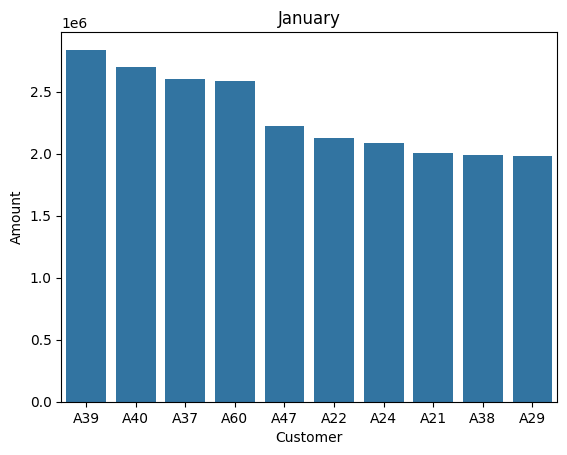

In [41]:
sns.barplot(x='Customer',y='Amount', data=df_first_month)
#sns.set(rc={'figure.figsize':(10,10)})
plt.title('January')

QUESTION NO 2

In [42]:
print(df_Repayment)

      Serial Number  Customer      Month  Amount
0                  1       A1  12-Jan-04  331844
1                  2       A1  03-Jan-04  441139
2                  3       A1  15-Jan-04   32480
3                  4       A1  25-Jan-04   90636
4                  5       A1  17-Jan-05    1581
...              ...      ...        ...     ...
1495            1496      A67  09-May-05  200288
1496            1497      A68  10-May-06  231194
1497            1498      A69  11-Jul-06  391195
1498            1499      A70  12-Aug-05  357629
1499            1500      A71  13-Sep-04  179771

[1500 rows x 4 columns]


In [43]:
date_col=pd.DatetimeIndex(df_Repayment['Month'])
df_Repayment['Day']=date_col.day
df_Repayment['Month_num']=date_col.month 
df_Repayment['Year']=date_col.year 


In [44]:
df_monthly_repayment = df_Repayment.groupby(['Customer','Month_num'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [45]:
print(df_monthly_repayment)

    Customer  Month_num   Amount
299      A41          1  3424753
315      A43          1  2714124
120      A22          1  2709315
351      A47          2  2673265
291      A40          1  2496295
..       ...        ...      ...
519      A72          2    14701
205      A30          6    12699
224      A33          8     6654
540      A87          3     4530
373      A49          8      247

[558 rows x 3 columns]


In [46]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 1]
    

In [47]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 2]
    

In [48]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 3]
    

In [49]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 4]
    

In [50]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 5]
    

In [51]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 6]
    

In [52]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 7]
    

In [53]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 8]
    

In [54]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 9]
    

In [55]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 10]
    

In [56]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 11]
    

In [57]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_repayment = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 12]
    

In [58]:
with pd.ExcelWriter('Monthly Repayment.xlsx')as writer:
 df_first_month_repayment.to_excel(writer,sheet_name='First month Repayment',index=False)
 df_second_month_repayment.to_excel(writer,sheet_name='Second month Repayment',index=False)
 df_third_month_repayment.to_excel(writer,sheet_name='Third month Repayment',index=False)
 df_fourth_month_repayment.to_excel(writer,sheet_name='Fourth month Repayment',index=False)
 df_fifth_month_repayment.to_excel(writer,sheet_name='Fifth month Repayment',index=False)
 df_sixth_month_repayment.to_excel(writer,sheet_name='Sixth month Repayment',index=False)
 df_seventh_month_repayment.to_excel(writer,sheet_name='Seventh month Repayment',index=False)
 df_eighth_month_repayment.to_excel(writer,sheet_name='Eighth month Repayment',index=False)
 df_nineth_month_repayment.to_excel(writer,sheet_name='Nineth month Repayment',index=False)
 df_tenth_month_repayment.to_excel(writer,sheet_name='Tenth month Repayment',index=False)
 df_eleventh_month_repayment.to_excel(writer,sheet_name='Eleventh month Repayment',index=False)
 df_twelth_month_repayment.to_excel(writer,sheet_name='Twelth month Repayment',index=False)

In [59]:
print(df_first_month_repayment)

    Customer  Month_num   Amount
299      A41          1  3424753
315      A43          1  2714124
120      A22          1  2709315
291      A40          1  2496295
275      A39          1  2386020
..       ...        ...      ...
554      A96          1   110139
556      A98          1    97802
553      A95          1    75109
551      A93          1    74576
503      A67          1    37163

[71 rows x 3 columns]


Text(0.5, 1.0, 'January')

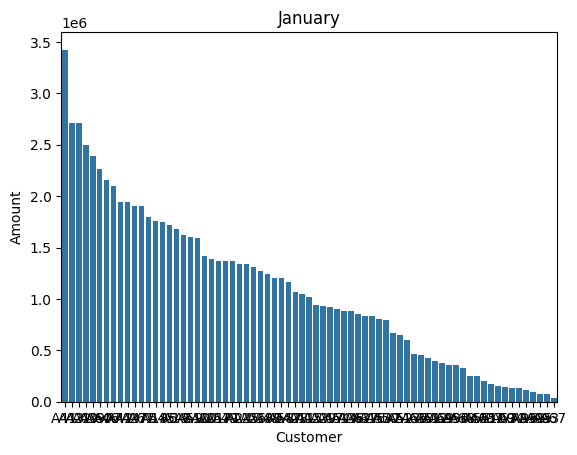

In [60]:
sns.barplot(x='Customer',y='Amount', data=df_first_month_repayment)
#sns.set(rc={'figure.figsize':(10,10)})
plt.title('January')

QUESTION NO 3

In [61]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 1].head(10)
    

In [62]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 2].head(10)
    

In [63]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 3].head(10)
    

In [64]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 4].head(10)
    

In [65]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 5].head(10)
    

In [66]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 6].head(10)
    

In [67]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 7].head(10)
    

In [68]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 8].head(10)
    

In [69]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 9].head(10)
    

In [70]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 10].head(10)
    

In [71]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 11].head(10)
    

In [72]:
for i in df_monthly_repayment['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_highest10 = df_monthly_repayment.loc[df_monthly_repayment['Month_num']== 12].head(10)
    

In [73]:
with pd.ExcelWriter('monthly Highest 10.xlsx')as writer:
 df_first_month_highest10.to_excel(writer,sheet_name='First month Highest 10',index=False)
 df_second_month_highest10.to_excel(writer,sheet_name='Second month Highest 10',index=False)
 df_third_month_highest10.to_excel(writer,sheet_name='Third month Highest 10',index=False)
 df_fourth_month_highest10.to_excel(writer,sheet_name='Fourth month Highest 10',index=False)
 df_fifth_month_highest10.to_excel(writer,sheet_name='Fifth month Highest 10',index=False)
 df_sixth_month_highest10.to_excel(writer,sheet_name='Sixth month Highest 10',index=False)
 df_seventh_month_highest10.to_excel(writer,sheet_name='Seventh month Highest 10',index=False)
 df_eighth_month_highest10.to_excel(writer,sheet_name='Eighth month Highest 10',index=False)
 df_nineth_month_highest10.to_excel(writer,sheet_name='Nineth month Highest 10',index=False)
 df_tenth_month_highest10.to_excel(writer,sheet_name='Tenth month Highest 10',index=False)
 df_eleventh_month_highest10.to_excel(writer,sheet_name='Eleventh month Highest 10',index=False)
 df_twelth_month_highest10.to_excel(writer,sheet_name='Twelth month Highest 10',index=False)

QUESTION NO 4

In [74]:
print(df_merged)

      Sl No:_x Customer    Age        City Credit Card Product   Limit  \
0            1       A1  38.08   BANGALORE                Gold  500000   
1            1       A1  38.08   BANGALORE                Gold  500000   
2            1       A1  38.08   BANGALORE                Gold  500000   
3            1       A1  38.08   BANGALORE                Gold  500000   
4            1       A1  38.08   BANGALORE                Gold  500000   
...        ...      ...    ...         ...                 ...     ...   
1495        96      A96  29.00     CHENNAI              Silver  100000   
1496        97      A97  20.00  TRIVANDRUM            Platimum   10000   
1497        98      A98  40.00    CALCUTTA            Platimum   10001   
1498        99      A99  21.00    CALCUTTA            Platimum   10002   
1499       100     A100  23.00      COCHIN              Silver  100000   

     Company        Segment  Sl No:_y      Month        Type  Amount  Day  \
0         C1  Self Employed       

In [75]:
df_segment_spending= df_merged.groupby(['Segment','Month_num'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False) 

In [76]:
print(df_segment_spending)

          Segment  Month_num    Amount
12  Normal Salary          1  25391039
14  Normal Salary          3  17710389
36   Salaried_Pvt          1  16897019
16  Normal Salary          5  16311834
13  Normal Salary          2  15777061
48  Self Employed          1  15293441
0            Govt          1  14572538
24   Salaried_MNC          1  14499911
49  Self Employed          2  14312613
28   Salaried_MNC          5  10995840
1            Govt          2  10911280
37   Salaried_Pvt          2  10429448
4            Govt          5  10365033
2            Govt          3  10169037
50  Self Employed          3   9982564
39   Salaried_Pvt          4   9845574
15  Normal Salary          4   9831911
26   Salaried_MNC          3   9674072
52  Self Employed          5   9148506
51  Self Employed          4   8714992
25   Salaried_MNC          2   8612072
38   Salaried_Pvt          3   8569018
40   Salaried_Pvt          5   8548867
22  Normal Salary         11   6178559
27   Salaried_MNC        

In [77]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 1]
    

In [78]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 2]
    

In [79]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 3]
    

In [80]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 4]
    

In [81]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 5]
    

In [82]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 6]
    

In [83]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 7]
    

In [84]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 8]
    

In [85]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 9]
    

In [86]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 10]
    

In [87]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 11]
    

In [88]:
for i in df_segment_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_segment = df_segment_spending.loc[df_segment_spending['Month_num']== 12]
    

In [89]:
with pd.ExcelWriter('Monthly profitable segment.xlsx')as writer:
 df_first_month_segment.to_excel(writer,sheet_name='First month segment',index=False)
 df_second_month_segment.to_excel(writer,sheet_name='Second month segment',index=False)
 df_third_month_segment.to_excel(writer,sheet_name='Third month segment',index=False)
 df_fourth_month_segment.to_excel(writer,sheet_name='Fourth month segment',index=False)
 df_fifth_month_segment.to_excel(writer,sheet_name='Fifth month segment',index=False)
 df_sixth_month_segment.to_excel(writer,sheet_name='Sixth month segment',index=False)
 df_seventh_month_segment.to_excel(writer,sheet_name='Seventh month segment',index=False)
 df_eighth_month_segment.to_excel(writer,sheet_name='Eighth month segment',index=False)
 df_nineth_month_segment.to_excel(writer,sheet_name='Nineth month segment',index=False)
 df_tenth_month_segment.to_excel(writer,sheet_name='Tenth month segment',index=False)
 df_eleventh_month_segment.to_excel(writer,sheet_name='Eleventh month segment',index=False)
 df_twelth_month_segment.to_excel(writer,sheet_name='Twelth month segment',index=False)

In [90]:
print(df_first_month_segment)

          Segment  Month_num    Amount
12  Normal Salary          1  25391039
36   Salaried_Pvt          1  16897019
48  Self Employed          1  15293441
0            Govt          1  14572538
24   Salaried_MNC          1  14499911


QUESTION NO 5

In [91]:
print(df_merged)

      Sl No:_x Customer    Age        City Credit Card Product   Limit  \
0            1       A1  38.08   BANGALORE                Gold  500000   
1            1       A1  38.08   BANGALORE                Gold  500000   
2            1       A1  38.08   BANGALORE                Gold  500000   
3            1       A1  38.08   BANGALORE                Gold  500000   
4            1       A1  38.08   BANGALORE                Gold  500000   
...        ...      ...    ...         ...                 ...     ...   
1495        96      A96  29.00     CHENNAI              Silver  100000   
1496        97      A97  20.00  TRIVANDRUM            Platimum   10000   
1497        98      A98  40.00    CALCUTTA            Platimum   10001   
1498        99      A99  21.00    CALCUTTA            Platimum   10002   
1499       100     A100  23.00      COCHIN              Silver  100000   

     Company        Segment  Sl No:_y      Month        Type  Amount  Day  \
0         C1  Self Employed       

In [92]:
df_age_group_spending=df_merged.groupby(['Age','Month_num'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [93]:
print(df_age_group_spending)

       Age  Month_num    Amount
84   38.08          1  21343179
85   38.08          2  17350720
86   38.08          3  12942591
88   38.08          5  12829069
87   38.08          4   7657973
..     ...        ...       ...
80   36.00          7     27819
14   19.00         11     25564
179  57.00          8     22417
167  52.00          8      8458
110  42.00          2       826

[318 rows x 3 columns]


In [94]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 1]
    

In [95]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 2]
    

In [96]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 3]
    

In [97]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 4]
    

In [98]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 5]
    

In [99]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 6]
    

In [100]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 7]
    

In [101]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 8]
    

In [102]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 9]
    

In [103]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 10]
    

In [104]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 11]
    

In [105]:
for i in df_age_group_spending['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_age_spending = df_age_group_spending.loc[df_age_group_spending['Month_num']== 12]
    

In [106]:
print(df_first_month_age_spending)

       Age  Month_num    Amount
84   38.08          1  21343179
214  66.00          1   5827411
160  52.00          1   4361981
234  68.00          1   3435889
261  71.00          1   3428153
148  51.00          1   2819022
97   40.00          1   2725017
244  69.00          1   2637566
17   22.00          1   2613106
282  74.00          1   2584386
306  78.00          1   2233357
181  58.00          1   2223221
111  44.00          1   2144558
74   36.00          1   2126633
123  45.00          1   2121038
273  72.00          1   2085558
56   29.00          1   2025063
299  77.00          1   1700769
67   35.00          1   1634244
190  59.00          1   1532867
292  76.00          1   1494497
0    18.00          1   1461937
133  47.00          1   1411484
7    19.00          1   1294500
37   26.00          1   1195833
29   25.00          1   1062077
253  70.00          1   1037959
45   27.00          1   1018212
173  57.00          1    865498
199  61.00          1    819545
208  62.

In [107]:
with pd.ExcelWriter('Age group spending.xlsx')as writer:
 df_first_month_age_spending.to_excel(writer,sheet_name='First month age spending',index=False)
 df_second_month_age_spending.to_excel(writer,sheet_name='Second month age spending',index=False)
 df_third_month_age_spending.to_excel(writer,sheet_name='Third month age spending',index=False)
 df_fourth_month_age_spending.to_excel(writer,sheet_name='Fourth month age spending',index=False)
 df_fifth_month_age_spending.to_excel(writer,sheet_name='Fifth month age spending',index=False)
 df_sixth_month_age_spending.to_excel(writer,sheet_name='Sixth month age spending',index=False)
 df_seventh_month_age_spending.to_excel(writer,sheet_name='Seventh month age spending',index=False)
 df_eighth_month_age_spending.to_excel(writer,sheet_name='Eighth month age spending',index=False)
 df_nineth_month_age_spending.to_excel(writer,sheet_name='Nineth month age spending',index=False)
 df_tenth_month_age_spending.to_excel(writer,sheet_name='Tenth month age spending',index=False)
 df_eleventh_month_age_spending.to_excel(writer,sheet_name='Eleventh month age spending',index=False)
 df_twelth_month_age_spending.to_excel(writer,sheet_name='Twelth month age spending',index=False)

QUESTION NO 6 

In [108]:
print(df_cus_aq)

    Sl No: Customer    Age        City Credit Card Product           Limit  \
0        1       A1  38.08   BANGALORE                Gold  INR 500,000.00   
1        2       A2  35.00    CALCUTTA              Silver  INR 100,000.00   
2        3       A3  38.08      COCHIN            Platimum   INR 10,000.00   
3        4       A4  45.00      BOMBAY            Platimum   INR 10,001.00   
4        5       A5  69.00   BANGALORE            Platimum   INR 10,002.00   
..     ...      ...    ...         ...                 ...             ...   
95      96      A96  29.00     CHENNAI              Silver  INR 100,000.00   
96      97      A97  20.00  TRIVANDRUM            Platimum   INR 10,000.00   
97      98      A98  40.00    CALCUTTA            Platimum   INR 10,001.00   
98      99      A99  21.00    CALCUTTA            Platimum   INR 10,002.00   
99     100     A100  23.00      COCHIN              Silver  INR 100,000.00   

   Company        Segment  
0       C1  Self Employed  
1      

In [109]:
df_cus_aq=df_cus_aq.rename(columns={'Credit Card Product':'Credit_Card_product'})

In [110]:
df_highest_selling_card=df_cus_aq.Credit_Card_product.value_counts()

In [111]:
print(df_highest_selling_card)

Credit_Card_product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64


In [112]:
print(df_cus_aq)

    Sl No: Customer    Age        City Credit_Card_product           Limit  \
0        1       A1  38.08   BANGALORE                Gold  INR 500,000.00   
1        2       A2  35.00    CALCUTTA              Silver  INR 100,000.00   
2        3       A3  38.08      COCHIN            Platimum   INR 10,000.00   
3        4       A4  45.00      BOMBAY            Platimum   INR 10,001.00   
4        5       A5  69.00   BANGALORE            Platimum   INR 10,002.00   
..     ...      ...    ...         ...                 ...             ...   
95      96      A96  29.00     CHENNAI              Silver  INR 100,000.00   
96      97      A97  20.00  TRIVANDRUM            Platimum   INR 10,000.00   
97      98      A98  40.00    CALCUTTA            Platimum   INR 10,001.00   
98      99      A99  21.00    CALCUTTA            Platimum   INR 10,002.00   
99     100     A100  23.00      COCHIN              Silver  INR 100,000.00   

   Company        Segment  
0       C1  Self Employed  
1      

In [113]:
#df_cus_aq['Count']=df_cus_aq['Credit Card Product'].size()

In [114]:
#df_cus_aq['Count'] = df_cus_aq.groupby(df_cus_aq.columns.tolist(), as_index=False).size()

In [115]:
#df_cus_aq['Count'] = df_cus_aq.groupby(df_cus_aq.columns.tolist(), as_index=False).size()

In [116]:
print(df_cus_aq)

    Sl No: Customer    Age        City Credit_Card_product           Limit  \
0        1       A1  38.08   BANGALORE                Gold  INR 500,000.00   
1        2       A2  35.00    CALCUTTA              Silver  INR 100,000.00   
2        3       A3  38.08      COCHIN            Platimum   INR 10,000.00   
3        4       A4  45.00      BOMBAY            Platimum   INR 10,001.00   
4        5       A5  69.00   BANGALORE            Platimum   INR 10,002.00   
..     ...      ...    ...         ...                 ...             ...   
95      96      A96  29.00     CHENNAI              Silver  INR 100,000.00   
96      97      A97  20.00  TRIVANDRUM            Platimum   INR 10,000.00   
97      98      A98  40.00    CALCUTTA            Platimum   INR 10,001.00   
98      99      A99  21.00    CALCUTTA            Platimum   INR 10,002.00   
99     100     A100  23.00      COCHIN              Silver  INR 100,000.00   

   Company        Segment  
0       C1  Self Employed  
1      

In [117]:
with pd.ExcelWriter('Highest selling card.xlsx')as writer:
 df_highest_selling_card.to_excel(writer,sheet_name='Highest selling card',index=False)

QUESTION NO 7

In [118]:
print(df_merged)

      Sl No:_x Customer    Age        City Credit Card Product   Limit  \
0            1       A1  38.08   BANGALORE                Gold  500000   
1            1       A1  38.08   BANGALORE                Gold  500000   
2            1       A1  38.08   BANGALORE                Gold  500000   
3            1       A1  38.08   BANGALORE                Gold  500000   
4            1       A1  38.08   BANGALORE                Gold  500000   
...        ...      ...    ...         ...                 ...     ...   
1495        96      A96  29.00     CHENNAI              Silver  100000   
1496        97      A97  20.00  TRIVANDRUM            Platimum   10000   
1497        98      A98  40.00    CALCUTTA            Platimum   10001   
1498        99      A99  21.00    CALCUTTA            Platimum   10002   
1499       100     A100  23.00      COCHIN              Silver  100000   

     Company        Segment  Sl No:_y      Month        Type  Amount  Day  \
0         C1  Self Employed       

In [119]:
df_segment_spending_by_card=df_merged.groupby(['Credit Card Product','Month_num'],as_index=False)['Amount'].sum().sort_values(by='Amount')

In [120]:
print(df_segment_spending_by_card)

   Credit Card Product  Month_num    Amount
33              Silver         10    567980
35              Silver         12   1439462
31              Silver          8   1696512
11                Gold         12   2285637
21            Platimum         10   2509397
23            Platimum         12   2630033
32              Silver          9   2677161
18            Platimum          7   2933829
30              Silver          7   3125489
9                 Gold         10   3141893
19            Platimum          8   3370307
20            Platimum          9   3631322
34              Silver         11   3715202
17            Platimum          6   3946738
6                 Gold          7   4841236
29              Silver          6   4859279
8                 Gold          9   4876974
7                 Gold          8   4976087
5                 Gold          6   6451931
10                Gold         11   9507472
22            Platimum         11   9960125
27              Silver          

In [121]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 1].sort_values(by='Amount',ascending=False)
    

In [122]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 2].sort_values(by='Amount',ascending=False)
    

In [123]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 3].sort_values(by='Amount',ascending=False)
    

In [124]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 4].sort_values(by='Amount',ascending=False)
    

In [125]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 5].sort_values(by='Amount',ascending=False)
    

In [126]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 6].sort_values(by='Amount',ascending=False)
    

In [127]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 7].sort_values(by='Amount',ascending=False)
    

In [128]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 8].sort_values(by='Amount',ascending=False)
    

In [129]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 9].sort_values(by='Amount',ascending=False)
    

In [130]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 10].sort_values(by='Amount',ascending=False)
    

In [131]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 11].sort_values(by='Amount',ascending=False)
    

In [132]:
for i in df_segment_spending_by_card['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_card_spending = df_segment_spending_by_card.loc[df_segment_spending_by_card['Month_num']== 12].sort_values(by='Amount',ascending=False)
    

In [133]:
print(df_first_month_card_spending)

   Credit Card Product  Month_num    Amount
12            Platimum          1  35524695
0                 Gold          1  30277318
24              Silver          1  20851935


Text(0.5, 1.0, 'January')

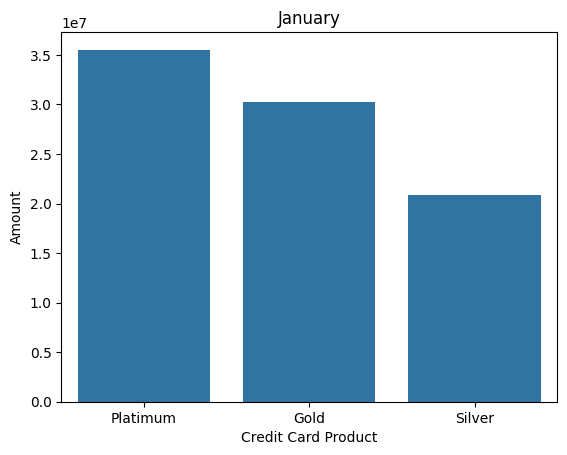

In [134]:
sns.barplot(x='Credit Card Product',y='Amount',data=df_first_month_card_spending)
plt.title('January')

In [135]:
with pd.ExcelWriter('Monthly card spending.xlsx')as writer:
 df_first_month_card_spending.to_excel(writer,sheet_name='First month card spending',index=False)
 df_second_month_card_spending.to_excel(writer,sheet_name='Second month card spending',index=False)
 df_third_month_card_spending.to_excel(writer,sheet_name='Third month card spending',index=False)
 df_fourth_month_card_spending.to_excel(writer,sheet_name='Fourth month card spending',index=False)
 df_fifth_month_card_spending.to_excel(writer,sheet_name='Fifth month card spending',index=False)
 df_sixth_month_card_spending.to_excel(writer,sheet_name='Sixth month card spending',index=False)
 df_seventh_month_card_spending.to_excel(writer,sheet_name='Seventh month card spending',index=False)
 df_eighth_month_card_spending.to_excel(writer,sheet_name='Eighth month card spending',index=False)
 df_nineth_month_card_spending.to_excel(writer,sheet_name='Nineth month card spending',index=False)
 df_tenth_month_card_spending.to_excel(writer,sheet_name='Tenth month card spending',index=False)
 df_eleventh_month_card_spending.to_excel(writer,sheet_name='Eleventh month card spending',index=False)
 df_twelth_month_card_spending.to_excel(writer,sheet_name='Twelth month card spending',index=False)

QUESTION NO 8

In [136]:
df_due= pd.merge(df_monthly_spend,df_monthly_repayment,on=['Customer','Month_num'],how='inner')

In [137]:
print(df_due)

    Customer  Month_num   Limit  Amount_x  Amount_y
0        A39          1  500000   2839184   2386020
1        A40          1  500000   2695912   2496295
2        A37          1  100003   2605015    834712
3        A60          1  500000   2584386   2259716
4        A47          1   10000   2223221   1167106
..       ...        ...     ...       ...       ...
449      A37          4  100003     24652    654153
450      A41          8  500000     23730    190057
451      A48         11   10001     15038    865344
452      A53          8  100003     14918     30235
453      A40          8  500000      8458    162088

[454 rows x 5 columns]


In [138]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_first_month_due = df_due.loc[df_due['Month_num']==1].sort_values(by='Amount_x',ascending=False)
    

In [139]:
df_first_month_due['Due']=df_first_month_due['Amount_x'].sub(df_first_month_due['Amount_y'])
df_first_month_due['2.5%_of_due_amount']=(df_first_month_due['Due']*2.5*1/100)
df_first_month_due['Amount_with_interest']=df_first_month_due['Due']+df_first_month_due['2.5%_of_due_amount']

In [140]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_second_month_due = df_due.loc[df_due['Month_num']==2].sort_values(by='Amount_x',ascending=False)
    

In [141]:
df_second_month_due['Due']=df_second_month_due['Amount_x'].sub(df_second_month_due['Amount_y'])
df_second_month_due['2.5%_of_due_amount']=(df_second_month_due['Due']*2.5*1/100)
df_second_month_due['Amount_with_interest']=df_second_month_due['Due']+df_second_month_due['2.5%_of_due_amount']

In [142]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_third_month_due = df_due.loc[df_due['Month_num']==3].sort_values(by='Amount_x',ascending=False)
    

In [143]:
df_third_month_due['Due']=df_third_month_due['Amount_x'].sub(df_third_month_due['Amount_y'])
df_third_month_due['2.5%_of_due_amount']=(df_third_month_due['Due']*2.5*1/100)
df_third_month_due['Amount_with_interest']=df_third_month_due['Due']+df_third_month_due['2.5%_of_due_amount']

In [144]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fourth_month_due = df_due.loc[df_due['Month_num']==4].sort_values(by='Amount_x',ascending=False)
    

In [145]:
df_fourth_month_due['Due']=df_fourth_month_due['Amount_x'].sub(df_fourth_month_due['Amount_y'])
df_fourth_month_due['2.5%_of_due_amount']=(df_fourth_month_due['Due']*2.5*1/100)
df_fourth_month_due['Amount_with_interest']=df_fourth_month_due['Due']+df_fourth_month_due['2.5%_of_due_amount']

In [146]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_fifth_month_due = df_due.loc[df_due['Month_num']==5].sort_values(by='Amount_x',ascending=False)
    

In [147]:
df_fifth_month_due['Due']=df_fifth_month_due['Amount_x'].sub(df_fifth_month_due['Amount_y'])
df_fifth_month_due['2.5%_of_due_amount']=(df_fifth_month_due['Due']*2.5*1/100)
df_fifth_month_due['Amount_with_interest']=df_fifth_month_due['Due']+df_fifth_month_due['2.5%_of_due_amount']

In [148]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_sixth_month_due = df_due.loc[df_due['Month_num']==6].sort_values(by='Amount_x',ascending=False)
    

In [149]:
df_sixth_month_due['Due']=df_sixth_month_due['Amount_x'].sub(df_sixth_month_due['Amount_y'])
df_sixth_month_due['2.5%_of_due_amount']=(df_sixth_month_due['Due']*2.5*1/100)
df_sixth_month_due['Amount_with_interest']=df_sixth_month_due['Due']+df_sixth_month_due['2.5%_of_due_amount']

In [150]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_seventh_month_due = df_due.loc[df_due['Month_num']==7].sort_values(by='Amount_x',ascending=False)
    

In [151]:
df_seventh_month_due['Due']=df_seventh_month_due['Amount_x'].sub(df_seventh_month_due['Amount_y'])
df_seventh_month_due['2.5%_of_due_amount']=(df_seventh_month_due['Due']*2.5*1/100)
df_seventh_month_due['Amount_with_interest']=df_seventh_month_due['Due']+df_seventh_month_due['2.5%_of_due_amount']

In [152]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eighth_month_due = df_due.loc[df_due['Month_num']==8].sort_values(by='Amount_x',ascending=False)
    

In [153]:
df_eighth_month_due['Due']=df_eighth_month_due['Amount_x'].sub(df_eighth_month_due['Amount_y'])
df_eighth_month_due['2.5%_of_due_amount']=(df_eighth_month_due['Due']*2.5*1/100)
df_eighth_month_due['Amount_with_interest']=df_eighth_month_due['Due']+df_eighth_month_due['2.5%_of_due_amount']

In [154]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_nineth_month_due = df_due.loc[df_due['Month_num']==9].sort_values(by='Amount_x',ascending=False)
    

In [155]:
df_nineth_month_due['Due']=df_nineth_month_due['Amount_x'].sub(df_nineth_month_due['Amount_y'])
df_nineth_month_due['2.5%_of_due_amount']=(df_nineth_month_due['Due']*2.5*1/100)
df_nineth_month_due['Amount_with_interest']=df_nineth_month_due['Due']+df_nineth_month_due['2.5%_of_due_amount']

In [156]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_tenth_month_due = df_due.loc[df_due['Month_num']==10].sort_values(by='Amount_x',ascending=False)
    

In [157]:
df_tenth_month_due['Due']=df_tenth_month_due['Amount_x'].sub(df_tenth_month_due['Amount_y'])
df_tenth_month_due['2.5%_of_due_amount']=(df_tenth_month_due['Due']*2.5*1/100)
df_tenth_month_due['Amount_with_interest']=df_tenth_month_due['Due']+df_tenth_month_due['2.5%_of_due_amount']

In [158]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_eleventh_month_due = df_due.loc[df_due['Month_num']==11].sort_values(by='Amount_x',ascending=False)
    

In [159]:
df_eleventh_month_due['Due']=df_eleventh_month_due['Amount_x'].sub(df_eleventh_month_due['Amount_y'])
df_eleventh_month_due['2.5%_of_due_amount']=(df_eleventh_month_due['Due']*2.5*1/100)
df_eleventh_month_due['Amount_with_interest']=df_eleventh_month_due['Due']+df_eleventh_month_due['2.5%_of_due_amount']

In [160]:
for i in df_due['Month_num']:
    #if df_monthly_spend['Month']== 1 :
       df_twelth_month_due = df_due.loc[df_due['Month_num']==12].sort_values(by='Amount_x',ascending=False)
    

In [161]:
df_twelth_month_due['Due']=df_twelth_month_due['Amount_x'].sub(df_twelth_month_due['Amount_y'])
df_twelth_month_due['2.5%_of_due_amount']=(df_twelth_month_due['Due']*2.5*1/100)
df_twelth_month_due['Amount_with_interest']=df_twelth_month_due['Due']+df_twelth_month_due['2.5%_of_due_amount']

In [162]:
print(df_twelth_month_due)

    Customer  Month_num   Limit  Amount_x  Amount_y     Due  \
262      A21         12   10002    487363     36303  451060   
291      A14         12  500000    439357    218088  221269   
333      A44         12  500000    352764    476157 -123393   
345      A45         12  500000    332819    260353   72466   
377      A36         12  100002    255209    311014  -55805   
381      A54         12  500000    242934    125570  117364   
385      A28         12  500000    230681    323231  -92550   
399      A53         12  100003    187340    458488 -271148   
424      A39         12  500000    127838    136117   -8279   
427      A64         12  500000    111388    355797 -244409   
444      A56         12  500000     45335    443880 -398545   

     2.5%_of_due_amount  Amount_with_interest  
262           11276.500            462336.500  
291            5531.725            226800.725  
333           -3084.825           -126477.825  
345            1811.650             74277.650  
377

In [163]:
with pd.ExcelWriter('Monthly due of customers.xlsx')as writer:
 df_first_month_due.to_excel(writer,sheet_name='First month due',index=False)
 df_second_month_due.to_excel(writer,sheet_name='Second month due',index=False)
 df_third_month_due.to_excel(writer,sheet_name='Third month due',index=False)
 df_fourth_month_due.to_excel(writer,sheet_name='Fourth month due',index=False)
 df_fifth_month_due.to_excel(writer,sheet_name='Fifth month due',index=False)
 df_sixth_month_due.to_excel(writer,sheet_name='Sixth month due',index=False)
 df_seventh_month_due.to_excel(writer,sheet_name='Seventh month due',index=False)
 df_eighth_month_due.to_excel(writer,sheet_name='Eighth month due',index=False)
 df_nineth_month_due.to_excel(writer,sheet_name='Nineth month due',index=False)
 df_tenth_month_due.to_excel(writer,sheet_name='Tenth month due',index=False)
 df_eleventh_month_due.to_excel(writer,sheet_name='Eleventh month due',index=False)
 df_twelth_month_due.to_excel(writer,sheet_name='Twelth month due',index=False)

QUESTION NO 9

In [164]:
df_jan_month_profit = df_first_month_due[df_first_month_due['2.5%_of_due_amount'] > 0].sum()

In [165]:
print(df_jan_month_profit)

Customer                A39A40A37A60A47A24A21A38A29A1A36A23A59A54A25A4...
Month_num                                                              38
Limit                                                            10770030
Amount_x                                                         50637778
Amount_y                                                         32793365
Due                                                              17844413
2.5%_of_due_amount                                             446110.325
Amount_with_interest                                         18290523.325
dtype: object


2.5%_of_due_amount is the January profit of Bank which is 446110.325

In [166]:
df_feb_month_profit = df_second_month_due[df_second_month_due['2.5%_of_due_amount'] > 0].sum()

In [167]:
print(df_feb_month_profit)

Customer                A13A48A41A40A14A28A12A42A27A1A37A55A56A9A20A43...
Month_num                                                              74
Limit                                                            10760022
Amount_x                                                         39143125
Amount_y                                                         26202382
Due                                                              12940743
2.5%_of_due_amount                                             323518.575
Amount_with_interest                                         13264261.575
dtype: object


2.5%_of_due_amount is the february profit of Bank which is 323518.575

In [168]:
df_mar_month_profit = df_third_month_due[df_third_month_due['2.5%_of_due_amount'] > 0].sum()

In [169]:
print(df_mar_month_profit)

Customer                A21A45A17A16A18A22A48A23A42A49A46A52A5A37A43A3...
Month_num                                                             117
Limit                                                             9760033
Amount_x                                                         40518670
Amount_y                                                         23650658
Due                                                              16868012
2.5%_of_due_amount                                               421700.3
Amount_with_interest                                           17289712.3
dtype: object


2.5%_of_due_amount is the march profit of Bank which is 421700.3

In [170]:
df_apr_month_profit = df_fourth_month_due[df_fourth_month_due['2.5%_of_due_amount'] > 0].sum()

In [171]:
print(df_apr_month_profit)

Customer                A22A24A48A50A26A41A27A21A49A23A25A42A57A43A13A...
Month_num                                                             124
Limit                                                             8650022
Amount_x                                                         27341996
Amount_y                                                         14692614
Due                                                              12649382
2.5%_of_due_amount                                              316234.55
Amount_with_interest                                          12965616.55
dtype: object


2.5%_of_due_amount is the april profit of Bank which is 316234.55

In [172]:
df_may_month_profit = df_fifth_month_due[df_fifth_month_due['2.5%_of_due_amount'] > 0].sum()

In [173]:
print(df_may_month_profit)

Customer                A28A44A61A58A10A37A36A13A21A60A5A15A54A59A51A4...
Month_num                                                             110
Limit                                                             6240020
Amount_x                                                         22617180
Amount_y                                                         15015616
Due                                                               7601564
2.5%_of_due_amount                                               190039.1
Amount_with_interest                                            7791603.1
dtype: object


2.5%_of_due_amount is the may profit of Bank which is 190039.1


In [174]:
df_june_month_profit = df_sixth_month_due[df_sixth_month_due['2.5%_of_due_amount'] > 0].sum()

In [175]:
print(df_june_month_profit)

Customer                A22A46A45A12A15A59A36A39A30A16
Month_num                                           60
Limit                                          3400005
Amount_x                                       7686028
Amount_y                                       2938488
Due                                            4747540
2.5%_of_due_amount                            118688.5
Amount_with_interest                         4866228.5
dtype: object


2.5%_of_due_amount is the june profit of Bank which is 118688.5


In [176]:
df_july_month_profit = df_seventh_month_due[df_seventh_month_due['2.5%_of_due_amount'] > 0].sum()

In [177]:
print(df_july_month_profit)

Customer                A16A23A48A14A25A13A39A60A59A40A36
Month_num                                              77
Limit                                             3410010
Amount_x                                          5662820
Amount_y                                          2453411
Due                                               3209409
2.5%_of_due_amount                              80235.225
Amount_with_interest                          3289644.225
dtype: object


2.5%_of_due_amount is the july profit of Bank which is 80235.225


In [178]:
df_aug_month_profit = df_eighth_month_due[df_eighth_month_due['2.5%_of_due_amount'] > 0].sum()

In [179]:
print(df_aug_month_profit)

Customer                A61A24A26A50A37A11A49A17A20A14
Month_num                                           80
Limit                                          2820008
Amount_x                                       4672933
Amount_y                                       1875756
Due                                            2797177
2.5%_of_due_amount                           69929.425
Amount_with_interest                       2867106.425
dtype: object


2.5%_of_due_amount is the august profit of Bank which is 69929.425


In [180]:
df_sep_month_profit = df_nineth_month_due[df_nineth_month_due['2.5%_of_due_amount'] > 0].sum()

In [181]:
print(df_sep_month_profit)

Customer                A60A18A25A41A50A42A24A16A33A51
Month_num                                           90
Limit                                          2510008
Amount_x                                       4863585
Amount_y                                       2771249
Due                                            2092336
2.5%_of_due_amount                             52308.4
Amount_with_interest                         2144644.4
dtype: object


2.5%_of_due_amount is the september profit of Bank which is 52308.4


In [182]:
df_oct_month_profit = df_tenth_month_due[df_tenth_month_due['2.5%_of_due_amount'] > 0].sum()

In [183]:
print(df_oct_month_profit)

Customer                A61A37A43A26A51A42
Month_num                               60
Limit                              2200004
Amount_x                           2303175
Amount_y                           1103050
Due                                1200125
2.5%_of_due_amount               30003.125
Amount_with_interest           1230128.125
dtype: object


2.5%_of_due_amount is the october profit of Bank which is 30003.125


In [184]:
df_nov_month_profit = df_eleventh_month_due[df_eleventh_month_due['2.5%_of_due_amount'] > 0].sum()

In [185]:
print(df_nov_month_profit)

Customer                A22A34A62A13A63A27A41A42A52A35A60A25A1A24A55A4...
Month_num                                                             198
Limit                                                             6110010
Amount_x                                                         11727462
Amount_y                                                          4440071
Due                                                               7287391
2.5%_of_due_amount                                             182184.775
Amount_with_interest                                          7469575.775
dtype: object


2.5%_of_due_amount is the november profit of Bank which is 182184.775


In [186]:
df_dec_month_profit = df_twelth_month_due[df_twelth_month_due['2.5%_of_due_amount'] > 0].sum()

In [187]:
print(df_dec_month_profit)

Customer                A21A14A45A54
Month_num                         48
Limit                        1510002
Amount_x                     1502473
Amount_y                      640314
Due                           862159
2.5%_of_due_amount         21553.975
Amount_with_interest      883712.975
dtype: object


2.5%_of_due_amount is the december profit of Bank which is 21553.975


In [188]:
with pd.ExcelWriter('Monthly profit of Bank.xlsx')as writer:
 df_jan_month_profit.to_excel(writer,sheet_name='First month profit',index=False)
 df_feb_month_profit.to_excel(writer,sheet_name='Second month profit',index=False)
 df_mar_month_profit.to_excel(writer,sheet_name='Third month profit',index=False)
 df_apr_month_profit.to_excel(writer,sheet_name='Fourth month profit',index=False)
 df_may_month_profit.to_excel(writer,sheet_name='Fifth month profit',index=False)
 df_june_month_profit.to_excel(writer,sheet_name='Sixth month profit',index=False)
 df_july_month_profit.to_excel(writer,sheet_name='Seventh month profit',index=False)
 df_aug_month_profit.to_excel(writer,sheet_name='Eighth month profit',index=False)
 df_sep_month_profit.to_excel(writer,sheet_name='Nineth month profit',index=False)
 df_oct_month_profit.to_excel(writer,sheet_name='Tenth month profit',index=False)
 df_nov_month_profit.to_excel(writer,sheet_name='Eleventh month profit',index=False)
 df_dec_month_profit.to_excel(writer,sheet_name='Twelth month profit',index=False)